In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium
from folium import plugins
import seaborn as sns
sns.set()
%matplotlib inline


## Import to panda dara fram

In [7]:

# Import the dataset to the datafram from csv file
crimes = pd.read_csv('Crime.csv',dtype={ 'PRA': 'string', 'Offence Code':'string'},parse_dates=['Start_Date_Time','End_Date_Time','Dispatch Date / Time'])


## Review the qulity of the data

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             306094 non-null  int64         
 1   Offence Code            306094 non-null  string        
 2   CR Number               306094 non-null  int64         
 3   Dispatch Date / Time    257065 non-null  datetime64[ns]
 4   NIBRS Code              306094 non-null  object        
 5   Victims                 306094 non-null  int64         
 6   Crime Name1             305822 non-null  object        
 7   Crime Name2             305822 non-null  object        
 8   Crime Name3             305822 non-null  object        
 9   Police District Name    306000 non-null  object        
 10  Block Address           279888 non-null  object        
 11  City                    304818 non-null  object        
 12  State                   306094

In [93]:
# read the first 5 rows of the dataset to get some idea of the data
crimes.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,2018-08-23 21:52:00,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:00,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [94]:
# Describe the dataset
crimes.describe()

,Incident ID,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude
count,3.060940e+05,3.060940e+05,306094.000000,302915.000000,2.799850e+05,306094.000000,306094.000000
mean,2.012369e+08,1.692787e+08,1.022692,20876.535939,8.393001e+03,38.146328,-75.269490
std,8.626185e+04,6.210304e+07,0.192311,170.157722,1.526296e+04,5.974082,11.786118
min,2.010871e+08,1.001107e+07,1.000000,6.000000,1.000000e+00,0.000000,-77.516753
25%,2.011625e+08,1.705431e+08,1.000000,20853.000000,1.600000e+03,39.020392,-77.197117
50%,2.012361e+08,1.900183e+08,1.000000,20878.000000,8.100000e+03,39.072844,-77.099464
75%,2.013109e+08,2.000466e+08,1.000000,20904.000000,1.250000e+04,39.142072,-77.029046
max,2.013872e+08,2.204211e+08,22.000000,29882.000000,2.090600e+06,90.000000,0.000000


### null value check by column 

In [9]:
# checking null value of column name `Crime Name1`
bool_series = pd.isnull(crimes["Crime Name1"])
crimes[bool_series]

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
2023,201362064,2611,220003727,2022-01-28 09:54:00,26G,1,NaN,NaN,NaN,GERMANTOWN,...,NaN,PEACH CREST,NaN,DR,2022-01-28 09:54:00,NaT,39.160790,-77.251300,5D,"(39.1608, -77.2513)"
2148,201318824,2611,210004591,2021-02-05 10:42:00,26G,1,NaN,NaN,NaN,CITY OF TAKOMA PARK,...,NaN,MAPLE,NaN,AVE,2021-01-30 12:00:00,2021-01-30 12:00:00,38.982665,-77.007460,8D,"(38.9827, -77.0075)"
2196,201338349,2611,210027488,2021-07-16 12:24:00,26G,2,NaN,NaN,NaN,MONTGOMERY VILLAGE,...,NaN,BANK,NaN,ST,2021-06-24 09:00:00,2021-07-14 09:00:00,39.140070,-77.221843,6D,"(39.1401, -77.2218)"
2733,201348185,3584,210039814,2021-10-06 12:50:00,35A,1,NaN,NaN,NaN,WHEATON,...,NaN,VEIRS MILL,NaN,RD,2021-10-06 12:50:00,NaT,39.037340,-77.051600,4D,"(39.0373, -77.0516)"
3847,201353468,5318,210046591,2021-11-16 23:38:00,90Z,1,NaN,NaN,NaN,SILVER SPRING,...,NaN,FEBRUARY,NaN,CIR,2021-11-16 23:34:00,NaT,39.047160,-76.976500,3D,"(39.0472, -76.9765)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304380,201323191,2611,210009562,2021-03-14 11:49:00,26G,1,NaN,NaN,NaN,ROCKVILLE,...,NaN,SEURAT,NaN,DR,2021-03-14 12:13:00,NaT,39.113599,-77.259905,1D,"(39.1136, -77.2599)"
304645,201325917,2611,210012147,2021-04-01 09:46:00,26G,1,NaN,NaN,NaN,BETHESDA,...,NaN,TOMLINSON,NaN,TER,2021-04-01 09:46:00,NaT,38.976512,-77.159030,2D,"(38.9765, -77.159)"
304852,201331890,2611,210019436,2021-05-23 04:09:00,26G,1,NaN,NaN,NaN,WHEATON,...,NaN,CLARIDGE,NaN,CT,2020-05-22 12:00:00,2021-05-23 23:00:00,39.051604,-77.066191,4D,"(39.0516, -77.0662)"
305013,201320263,2611,210006218,2021-02-17 12:47:00,26G,2,NaN,NaN,NaN,MONTGOMERY VILLAGE,...,NaN,HILLSIDE,NaN,TER,2021-02-17 12:47:00,NaT,39.163836,-77.123060,6D,"(39.1638, -77.1231)"


In [18]:
# checking count of null values at column name `Crime Name1`
crimes["Crime Name1"].isnull().sum()


272

In [20]:
# checking null value of column name `Crime Name2`
bool_series = pd.isnull(crimes["Crime Name2"])
crimes[bool_series]

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
2023,201362064,2611,220003727,2022-01-28 09:54:00,26G,1,NaN,NaN,NaN,GERMANTOWN,...,NaN,PEACH CREST,NaN,DR,2022-01-28 09:54:00,NaT,39.160790,-77.251300,5D,"(39.1608, -77.2513)"
2148,201318824,2611,210004591,2021-02-05 10:42:00,26G,1,NaN,NaN,NaN,CITY OF TAKOMA PARK,...,NaN,MAPLE,NaN,AVE,2021-01-30 12:00:00,2021-01-30 12:00:00,38.982665,-77.007460,8D,"(38.9827, -77.0075)"
2196,201338349,2611,210027488,2021-07-16 12:24:00,26G,2,NaN,NaN,NaN,MONTGOMERY VILLAGE,...,NaN,BANK,NaN,ST,2021-06-24 09:00:00,2021-07-14 09:00:00,39.140070,-77.221843,6D,"(39.1401, -77.2218)"
2733,201348185,3584,210039814,2021-10-06 12:50:00,35A,1,NaN,NaN,NaN,WHEATON,...,NaN,VEIRS MILL,NaN,RD,2021-10-06 12:50:00,NaT,39.037340,-77.051600,4D,"(39.0373, -77.0516)"
3847,201353468,5318,210046591,2021-11-16 23:38:00,90Z,1,NaN,NaN,NaN,SILVER SPRING,...,NaN,FEBRUARY,NaN,CIR,2021-11-16 23:34:00,NaT,39.047160,-76.976500,3D,"(39.0472, -76.9765)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304380,201323191,2611,210009562,2021-03-14 11:49:00,26G,1,NaN,NaN,NaN,ROCKVILLE,...,NaN,SEURAT,NaN,DR,2021-03-14 12:13:00,NaT,39.113599,-77.259905,1D,"(39.1136, -77.2599)"
304645,201325917,2611,210012147,2021-04-01 09:46:00,26G,1,NaN,NaN,NaN,BETHESDA,...,NaN,TOMLINSON,NaN,TER,2021-04-01 09:46:00,NaT,38.976512,-77.159030,2D,"(38.9765, -77.159)"
304852,201331890,2611,210019436,2021-05-23 04:09:00,26G,1,NaN,NaN,NaN,WHEATON,...,NaN,CLARIDGE,NaN,CT,2020-05-22 12:00:00,2021-05-23 23:00:00,39.051604,-77.066191,4D,"(39.0516, -77.0662)"
305013,201320263,2611,210006218,2021-02-17 12:47:00,26G,2,NaN,NaN,NaN,MONTGOMERY VILLAGE,...,NaN,HILLSIDE,NaN,TER,2021-02-17 12:47:00,NaT,39.163836,-77.123060,6D,"(39.1638, -77.1231)"


In [19]:
# checking count of null values at column name `Crime Name2`
crimes["Crime Name2"].isnull().sum()


272

In [95]:
# checking null value count of each column in the dataset
crimes.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

# Data Preprocessing & Transformation
#### State_Date_Time column is transforming into four new columns.
1. Year
1. Month
1. Year-Month
1. Day


In [96]:
# insert a new colomn named 'Year': extract the year from start_date_time column
crimes['Year'] = pd.DatetimeIndex(crimes['Start_Date_Time']).year

In [97]:
# insert a new colomn named 'Month': extract the month from start_date_time column
crimes['Month'] = pd.DatetimeIndex(crimes['Start_Date_Time']).month

In [98]:
# insert a new colomn named 'Year-Month': extract the year-month from start_date_time column
crimes['Year-Month'] = pd.to_datetime(crimes['Start_Date_Time']).dt.to_period('M')

In [99]:
# insert a new colomn named 'Day': extract the day from start_date_time column
crimes['Day'] = pd.DatetimeIndex(crimes['Start_Date_Time']).day

In [100]:
# preview the first n rows of the dataframe
crimes.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day
0,201202980,3550,180042096,2018-08-23 21:52:00,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,2018-08,23
1,201181293,3522,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30
2,201181293,3562,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30
3,201193163,3520,180029476,2018-06-14 22:26:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,2018-06,14
4,201204355,2204,180043926,2018-09-03 12:06:00,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2018-09,2


In [101]:
crimes['Police District Number'].unique()

array(['5D', '2D', '6D', '4D', '3D', '1D', '8D', 'OTHER', '8.0D', 'TPPD',
       '1.0D', '3.0D', '6.0D', '4.0D', '5.0D'], dtype=object)

In [102]:
crimes_count = crimes.groupby(["Police District Name"])['Police District Number'].value_counts()
print (crimes_count.sort_values(ascending=False))

Police District Name  Police District Number
SILVER SPRING         3D                        64388
WHEATON               4D                        57568
MONTGOMERY VILLAGE    6D                        52539
BETHESDA              2D                        42777
ROCKVILLE             1D                        41535
GERMANTOWN            5D                        39255
CITY OF TAKOMA PARK   8D                         6408
TAKOMA PARK           TPPD                       1284
OTHER                 OTHER                       246
Name: Police District Number, dtype: int64


In [103]:
##It is clear that 4D and 4.0D is same police district.

In [104]:
def refactor_police_district_number(argument):
    match argument:
         case '1.0D':
            return "1D"
         case '2.0D':
            return "2D"
         case '3.0D':
            return "3D"
         case '4.0D':
            return "4D"
         case '5.0D':
            return "5D"
         case '6.0D':
            return "6D"
         case '7.0D':
            return "7D"
         case '8.0D':
            return "8D"
         case default:
            return argument

crimes['Police District Number'] = crimes['Police District Number'].apply(refactor_police_district_number)

In [105]:
crimes['Police District Number'].unique()

array(['5D', '2D', '6D', '4D', '3D', '1D', '8D', 'OTHER', 'TPPD'],
      dtype=object)

In [106]:
# Since Police District Number and Police District Name same thing we can replace null values of Police District Name from 
# Police District Number

In [107]:
def refactor_police_district_name(argument):
    match argument:
         case '1D':
            return "ROCKVILLE"
         case '2D':
            return "BETHESDA"
         case '3D':
            return "SILVER SPRING"
         case '4D':
            return "WHEATON"
         case '5D':
            return "GERMANTOWN"
         case '6D':
            return "MONTGOMERY VILLAGE"
         case '8D':
            return "CITY OF TAKOMA PARK"
         case 'TPPD':
            return "TAKOMA PARK"
         case 'OTHER':
            return "OTHER"
         case default:
            return argument

crimes['Police District Name'] = crimes['Police District Number'].apply(refactor_police_district_name)

In [108]:
# let's work on null values of city column

In [109]:
null_rows_city = crimes[crimes['City'].isnull()]
null_rows_city.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day
358,201334197,2305,210022270,2021-06-11 10:19:00,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,CITY OF TAKOMA PARK,...,2021-06-10 20:00:00,2021-06-11 10:16:00,38.967333,-77.001288,8D,"(38.9673, -77.0013)",2021,6,2021-06,10
398,201330620,2404,210017991,2021-05-13 11:08:00,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,CITY OF TAKOMA PARK,...,2021-05-13 10:56:00,NaT,38.965699,-77.002473,8D,"(38.9657, -77.0025)",2021,5,2021-05,13
905,201332913,2305,210020757,2021-06-01 14:47:00,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,CITY OF TAKOMA PARK,...,2021-05-30 11:00:00,2021-06-01 14:46:00,38.972982,-76.996832,8D,"(38.973, -76.9968)",2021,5,2021-05,30
1559,201336265,2902,210024766,2021-06-28 12:23:00,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,...,2021-06-28 11:15:00,2021-06-28 11:58:00,38.984532,-77.026610,3D,"(38.9845, -77.0266)",2021,6,2021-06,28
1896,201318325,2303,210004042,2021-02-01 10:55:00,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,...,2021-02-01 10:30:00,2021-02-01 10:30:00,39.036569,-77.030910,8D,"(39.0366, -77.0309)",2021,2,2021-02,1


In [110]:
# we notice that all the null values of city column belongs to one State

In [111]:
null_rows_city = crimes[crimes['City'].isnull()]
null_rows_city[null_rows_city['State'] == 'MD']['State'].value_counts()

MD    1276
Name: State, dtype: int64

In [112]:
crimes['City'].isnull().sum()

1276

In [113]:
# We can replace null values of city column by same value

In [114]:
crimes['City'].fillna('MD City', inplace=True)

In [115]:
crimes['Crime Name1'].unique()

array(['Crime Against Society', 'Crime Against Property',
       'Crime Against Person', 'Other', 'Not a Crime', nan], dtype=object)

In [116]:
crimes['Crime Name2'].unique()

array(['Drug Equipment Violations', 'Drug/Narcotic Violations',
       'Burglary/Breaking and Entering', 'Motor Vehicle Theft',
       'Weapon Law Violations', 'Forcible Rape', 'Simple Assault',
       'All Other Offenses', 'All other Larceny', 'Shoplifting',
       'Driving Under the Influence', 'Counterfeiting/Forgery',
       'Aggravated Assault', 'Robbery', 'Runaway',
       'Destruction/Damage/Vandalism of Property', 'Fondling',
       'Stolen Property Offenses', 'Theft From Motor Vehicle',
       'Sexual Assault With An Object', 'Forcible Fondling',
       'Identity Theft', 'Drunkenness', 'Arson', 'Theft from Building',
       'Trespass of Real Property',
       'Murder and Nonnegligent Manslaughter', 'Liquor Law Violations',
       'Justifiable Homicide', 'Forcible Sodomy',
       'Pornography/Obscene Material',
       'Credit Card/Automatic Teller Machine Fraud', 'Intimidation',
       'Impersonation', 'Theft of Motor Vehicle Parts or Accessories',
       'False Pretenses/Swind

In [117]:
crimes['Crime Name3'].unique()

array(['DRUGS - NARCOTIC EQUIP - POSSESS',
       'DRUGS - OPIUM OR DERIVATIVE - POSSESS',
       'DRUGS - MARIJUANA - POSSESS',
       'DRUGS - OPIUM OR DERIVATIVE - SELL',
       'BURGLARY - NO FORCED ENTRY-RESIDENTIAL',
       'AUTO THEFT - VEHICLE THEFT', 'WEAPON - FIRING',
       'RAPE - STRONG-ARM', 'ASSAULT - 2ND DEGREE', 'POLICE INFORMATION',
       'LARCENY (DESCRIBE OFFENSE)', 'LARCENY - SHOPLIFTING',
       'DRIVING UNDER THE INFLUENCE LIQUOR', 'FORGERY OF CHECKS',
       'ASSAULT - AGGRAVATED - GUN', 'ROBBERY - STREET-GUN',
       'SUDDEN DEATH', 'MENTAL ILLNESS - EMERGENCY PETITION',
       'JUVENILE - RUNAWAY', 'LOST PROPERTY', 'MISSING PERSON',
       'DAMAGE PROPERTY - PRIVATE', 'SEX OFFENSE - FONDLING',
       'STOLEN PROPERTY - POSSESS',
       'OBSTRUCT POLICE - OBSTRUCT CRIMINAL INVEST', 'WEAPON - CONCEALED',
       'ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON',
       'BURGLARY - FORCED ENTRY-NONRESIDENTIAL', 'LARCENY - FROM AUTO',
       'BURGLARY - NO FORCED ENTRY

In [118]:
# Since Crime Name1, Crime Name2 and Crime Name3 are the discription about the nature of the crime
#we can replace all the null values by adding ""

In [119]:
crimes['Crime Name1'].fillna(value='',  inplace=True)
crimes['Crime Name2'].fillna(value='',  inplace=True)
crimes['Crime Name3'].fillna(value='',  inplace=True)

# Get the days of the week and what time of a day have the highest crime rate

In [120]:
# insert a new column named 'crime_count'
# crime count: each row is a crime record. So, set the default value as "1"
crimes.insert(loc=0, column="crime_count", value=1)
crimes.head()

,crime_count,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day
0,1,201202980,3550,180042096,2018-08-23 21:52:00,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,...,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,2018-08,23
1,1,201181293,3522,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,...,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30
2,1,201181293,3562,180015424,2018-03-30 01:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,...,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30
3,1,201193163,3520,180029476,2018-06-14 22:26:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,...,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,2018-06,14
4,1,201204355,2204,180043926,2018-09-03 12:06:00,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,...,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2018-09,2


In [121]:
# reset date index, as original dispach date/time has a lot missing values
crimes.index = pd.to_datetime(10000 * crimes.Year + 100 * crimes.Month + crimes.Day,
                          format='%Y%m%d')
# sort index, by ascending order of datetime
crimes.sort_index(inplace=True)
crimes.head()

,crime_count,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day
2016-07-01,1,201087200,2205,16033352,NaT,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-NONRESIDENTIAL,...,2016-07-01 15:59:00,NaT,38.998593,-77.117826,2D,"(38.9986, -77.1178)",2016,7,2016-07,1
2016-07-01,1,201087254,2605,16033434,NaT,26B,1,Crime Against Property,Credit Card/Automatic Teller Machine Fraud,FRAUD - ILLEGAL USE CREDIT CARDS,...,2016-07-01 19:00:00,2016-07-01 20:00:00,39.092026,-77.147406,1D,"(39.092, -77.1474)",2016,7,2016-07,1
2016-07-01,1,201087231,4104,16033420,NaT,90G,1,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,...,2016-07-01 22:21:00,2016-07-01 22:21:00,38.998869,-76.998236,3D,"(38.9989, -76.9982)",2016,7,2016-07,1
2016-07-01,1,201087150,2589,16033287,NaT,250,1,Crime Against Property,Counterfeiting/Forgery,FORGERY (DESCRIBE OFFENSE),...,2016-07-01 10:40:00,2016-07-01 10:40:00,39.148951,-77.207681,6D,"(39.149, -77.2077)",2016,7,2016-07,1
2016-07-01,1,201087937,5404,16033240,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,...,2016-07-01 01:37:00,NaT,39.006547,-77.111792,2D,"(39.0065, -77.1118)",2016,7,2016-07,1


In [122]:
#Let's get Total Crime and Victims counts for each day of the week

In [123]:
# using groupby dayofweek to get the sum of each attribute
crimes.groupby(crimes.index.dayofweek)[['crime_count', 'Victims']].sum()

,crime_count,Victims
0,42899,43880
1,44971,45869
2,45730,46636
3,45173,46057
4,47959,48960
5,41283,42344
6,38079,39294


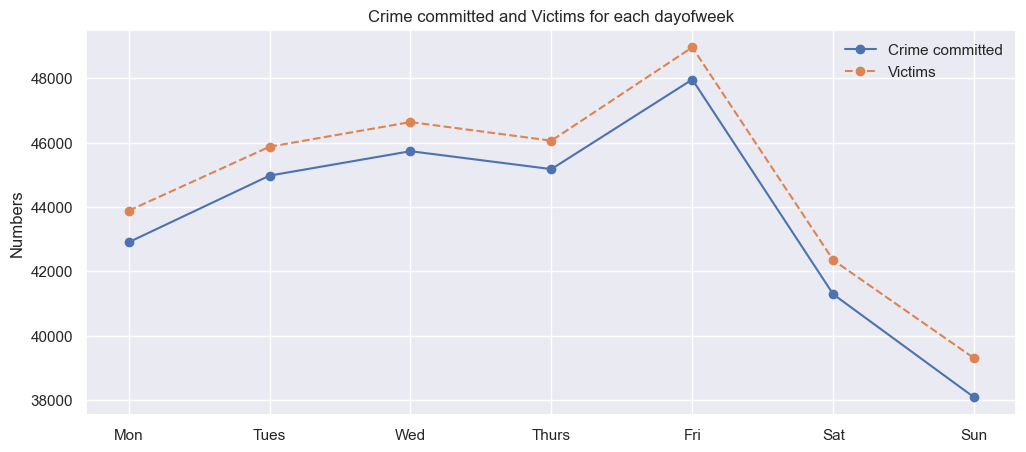

In [124]:
# sum of crime and victims for each dayofweek
by_weekday = crimes.groupby(crimes.index.dayofweek)[['crime_count', 'Victims']].sum()
# set the index of each day of week
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-o', '--o'], figsize=(12, 5))
plt.title('Crime committed and Victims for each dayofweek')
plt.ylabel('Numbers')
plt.legend(['Crime committed', 'Victims'], frameon=False)

In [125]:
#An interesting observation from the above graph is that there is a significant decrease in the number of crimes on weekends compared to weekdays. Further research on this behavior is needed.

In [126]:
#let's get Total number of crimes and victims at different times of the day

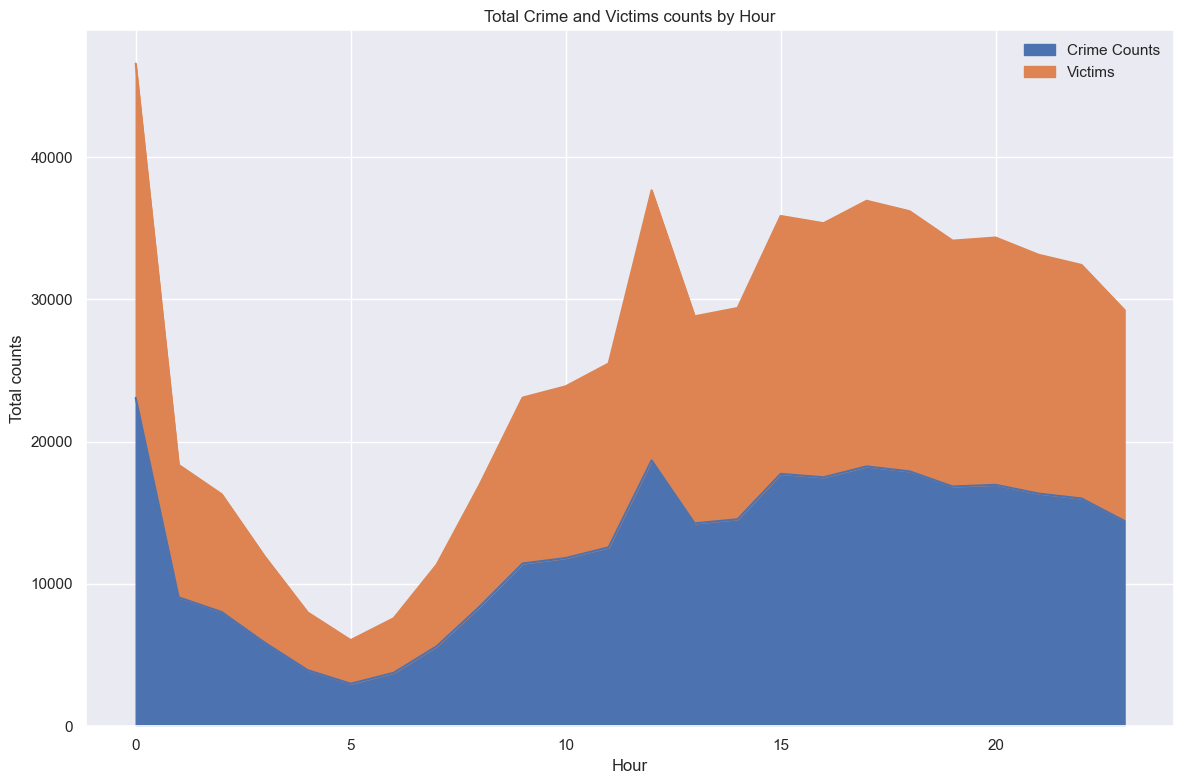

In [82]:
# using query to get the crime_count and victims total for each hour
# here, we extract the hour from start_date_time column,
# as it contains the hour info needed and without missing values

crimes['Hour'] = crimes['Start_Date_Time'].apply(pd.to_datetime, dayfirst=True).dt.hour

by_time = crimes.groupby(crimes['Hour'])[['crime_count', 'Victims']].sum()

by_time.plot(kind='area',
             title='Total Crime and Victims counts by Hour',
             ylabel='Total counts',
             xlabel='Hour',
             figsize=(12, 8))

ax = plt.gca()
l = ax.legend(frameon=False)
l.get_texts()[0].set_text('Crime Counts')
plt.tight_layout()

In [127]:
#As the graph above shows, the crime rate is lowest at 5:00 a.m. And the crime rate is highest at midnight.

# Get the most occured crimes

In [128]:
#let's Identifying the crime type that occurred most during the period between 2016 and 2022 based on “Crime Name1”.

In [129]:
groupByCrime1Df=crimes.groupby(by='Crime Name1')['Crime Name1'].count()
groupByPliceDistrictDf

Police District Name
BETHESDA               42777
CITY OF TAKOMA PARK     6490
GERMANTOWN             39257
MONTGOMERY VILLAGE     52541
OTHER                    246
ROCKVILLE              41536
SILVER SPRING          64394
TAKOMA PARK             1284
WHEATON                57569
Name: Police District Name, dtype: int64

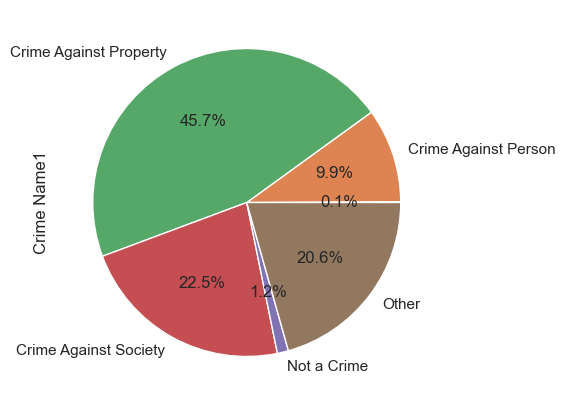

In [130]:
# plot pie chart of crimes at police districts
plot = groupByCrime1Df.plot.pie(style=['-o', '--o'], figsize=(12, 5), autopct='%1.1f%%')

In [131]:
#Crimes against property accounted for the largest proportion of crimes, almost half of all crimes.

In [132]:
#Let's analayze it ferthur using "Crime Name2" and "Crime Name3"

In [133]:
# Since Crime Name1, Crime Name2 and Crime Name3 are discription about the nature of the crime
#we can combine all the columns to one column
#But Crime Name1, is repeating "Crime Against" word in all the column we are not going to combine it

In [134]:
crimes["crime"] =  crimes['Crime Name2']+ crimes['Crime Name3']+ crimes['Crime Name3']

In [135]:
#New data set 

In [136]:
crimes.head()

,crime_count,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,End_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day,crime
2016-07-01,1,201087200,2205,16033352,NaT,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-NONRESIDENTIAL,...,NaT,38.998593,-77.117826,2D,"(38.9986, -77.1178)",2016,7,2016-07,1,Burglary/Breaking and EnteringBURGLARY - NO FO...
2016-07-01,1,201087254,2605,16033434,NaT,26B,1,Crime Against Property,Credit Card/Automatic Teller Machine Fraud,FRAUD - ILLEGAL USE CREDIT CARDS,...,2016-07-01 20:00:00,39.092026,-77.147406,1D,"(39.092, -77.1474)",2016,7,2016-07,1,Credit Card/Automatic Teller Machine FraudFRAU...
2016-07-01,1,201087231,4104,16033420,NaT,90G,1,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,...,2016-07-01 22:21:00,38.998869,-76.998236,3D,"(38.9989, -76.9982)",2016,7,2016-07,1,Liquor Law ViolationsLIQUOR - POSSESSLIQUOR - ...
2016-07-01,1,201087150,2589,16033287,NaT,250,1,Crime Against Property,Counterfeiting/Forgery,FORGERY (DESCRIBE OFFENSE),...,2016-07-01 10:40:00,39.148951,-77.207681,6D,"(39.149, -77.2077)",2016,7,2016-07,1,Counterfeiting/ForgeryFORGERY (DESCRIBE OFFENS...
2016-07-01,1,201087937,5404,16033240,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,...,NaT,39.006547,-77.111792,2D,"(39.0065, -77.1118)",2016,7,2016-07,1,Driving Under the InfluenceDRIVING UNDER THE I...


In [137]:
#The descriptions of crime cloumn are rich in words, thus, based in this words,
#we can make assumptions about the presence of violence in this crimes
#A good strategy is to build a word cloud from crime

In [138]:
from collections import Counter
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopw = set(stopwords.words('english'))

#from string import digits
text = crimes['crime'].to_string().lower()

text = ' '.join([word for word in text.split() if word not in stopw])

text = ''.join(i for i in text if not i.isdigit())
#text = ''.join(ch for ch in text if ch not in set(string.punctuation))
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
text = text.translate(translator)
text = text.split()

text_dict = Counter(text)

# WordCloud module: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

text = crimes['crime'].to_string()
#wordcloud = WordCloud(background_color='white', height=1000, width=2500).generate(text)
wordcloud = WordCloud(background_color='white', height=1000, width=1000).generate_from_frequencies(text_dict)
plt.figure(1,[100,250])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IsuruMadumadawa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
#It's clear that Motor vehicle theft is the most occured crime 
#Since most occured crime type is Crimes against property this result clearl indicate that

In [140]:
## Let's analayze it based on police district and city

## Identify the most violence police district or city

In [141]:
groupByPliceDistrictDf=crimes.groupby(by='Police District Name')['Police District Name'].count()
groupByPliceDistrictDf

Police District Name
BETHESDA               42777
CITY OF TAKOMA PARK     6490
GERMANTOWN             39257
MONTGOMERY VILLAGE     52541
OTHER                    246
ROCKVILLE              41536
SILVER SPRING          64394
TAKOMA PARK             1284
WHEATON                57569
Name: Police District Name, dtype: int64

### Plot a pie chart crime count with police distrct

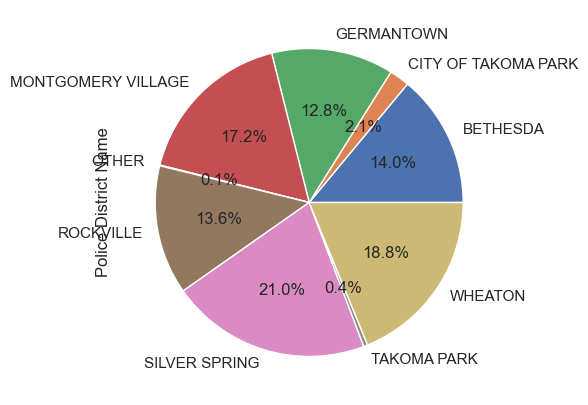

In [143]:
# plot pie chart of crimes at police districts
plot = groupByPliceDistrictDf.plot.pie(style=['-o', '--o'], figsize=(12, 5), autopct='%1.1f%%')


### Plot a bar chart to visualized crimes count at police districts

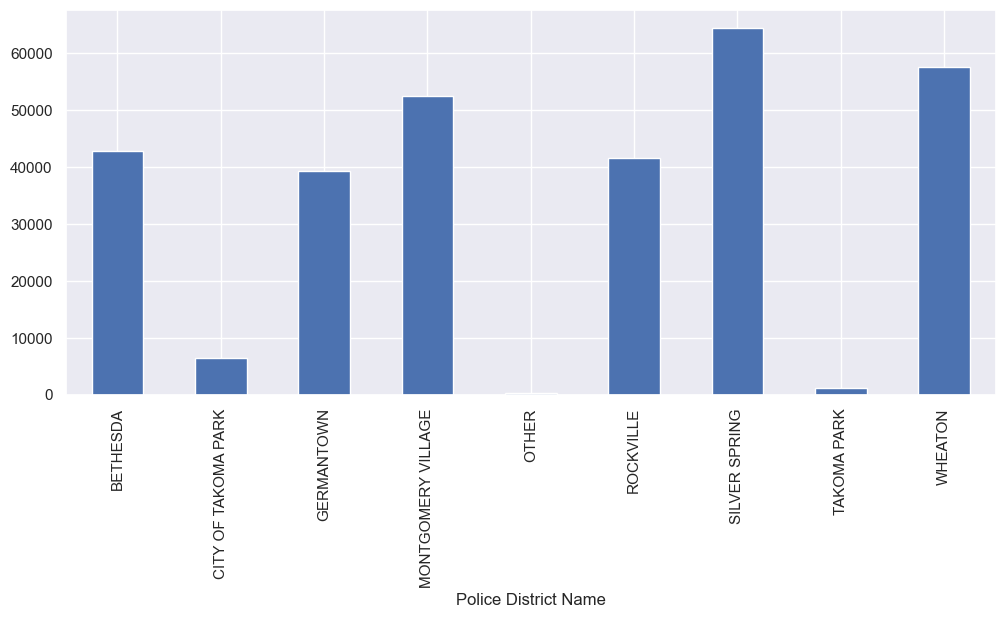

In [144]:
# plot bar chart of crimes at police districts
plot = groupByPliceDistrictDf.plot.bar(style=['-o', '--o'], figsize=(12, 5))

### Looking at above two graphs it can be easaly determind SIVER SPRING polics district having highest number of total crime(21%) in year 2017 to 2022.
### Lets take the to chek the top five crime subcategories of SILVER SPRING police distict

In [24]:
# select the dataset which requred to identify top 5 crime subcategores which has higer victims
slverSpringDf = crimes[["Police District Name", "Crime Name2", "Victims"]]

# select the crime records of SILVER SPRING police distict
slverSpringDf = slverSpringDf.query("`Police District Name`=='SILVER SPRING'")

# group the recode with Crime Name2 and sum the Victims
topVictimsGroupsDf= slverSpringDf.groupby(["Crime Name2"],sort=False)["Victims"].sum().reset_index()

top5CrimeCat = topVictimsGroupsDf.sort_values("Victims", ascending=False).nlargest(5,"Victims")

top5CrimeCat

,Crime Name2,Victims
2,All Other Offenses,12893
10,Theft From Motor Vehicle,6222
9,Drug/Narcotic Violations,5990
0,Simple Assault,5318
4,Destruction/Damage/Vandalism of Property,4251


###  Filter out the "All other offenses" and get the top five crime subcatagory(Crime Name2) list of the police district of SILVER SPRING 

In [25]:
# flter the category with  "All other offenses"
top5CrimeCat = topVictimsGroupsDf.query("`Crime Name2` != 'All Other Offenses'")

# take the top five
top5CrimeCat = top5CrimeCat.sort_values("Victims", ascending=False).nlargest(5,"Victims")

top5CrimeCat

,Crime Name2,Victims
10,Theft From Motor Vehicle,6222
9,Drug/Narcotic Violations,5990
0,Simple Assault,5318
4,Destruction/Damage/Vandalism of Property,4251
5,Driving Under the Influence,2926


### Let's Put crime subcategory breakdown into pie chart for undastanding precentage of top five

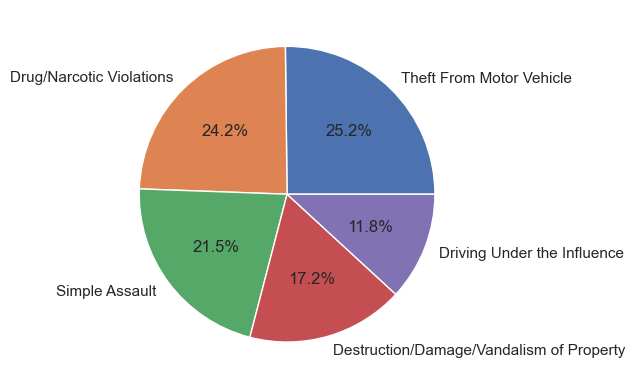

In [26]:
plt.pie(top5CrimeCat["Victims"], labels = top5CrimeCat["Crime Name2"], autopct ='%1.1f%%')
plt.show()

In [27]:
top5CrimeCat.head()

,Crime Name2,Victims
10,Theft From Motor Vehicle,6222
9,Drug/Narcotic Violations,5990
0,Simple Assault,5318
4,Destruction/Damage/Vandalism of Property,4251
5,Driving Under the Influence,2926


<AxesSubplot: xlabel='Crime Name2'>

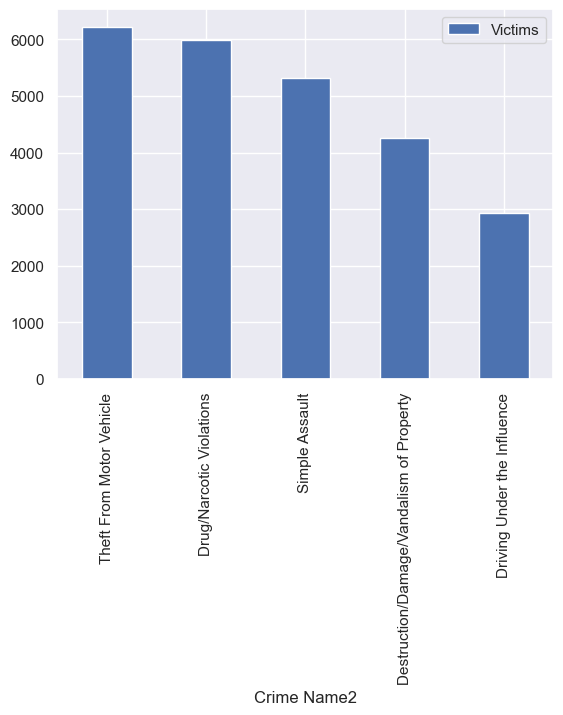

In [155]:
 top5CrimeCat.plot.bar(x="Crime Name2")

## As we can see in the figures "Theft From Motor Vehicle" is the highest crime subcategory 

In [145]:
groupBycityDf=crimes.groupby(by='City')['City'].count()
groupBycityDf

City
0                     1
ADELPHI               4
ALEXANDRIA            1
ASHTON              419
BARNESVILLE          48
                   ... 
WASHINGTON           23
WASHINGTON GROVE      9
WEST FRIENDSHIP       1
WHEATON               6
WOODBINE              7
Name: City, Length: 67, dtype: int64

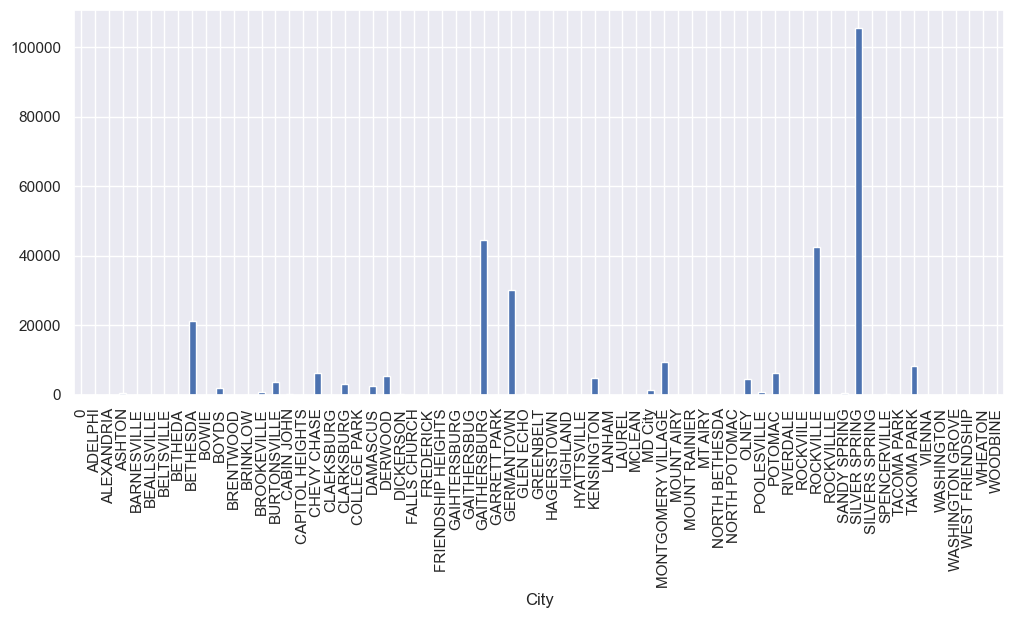

In [146]:
# plot bar chart of crimes at police districts
plot = groupBycityDf.plot.bar(style=['-o', '--o'], figsize=(12, 5))

In [ ]:

# we already analyaze that most occured crimes word on Montgomery County is "Motor" and "Thet"
#That is make sence

In [157]:
#Since most of the crimes related to theft and most of the time theft is not a violance crime
#Let's try to analayze same thing based on some violace crimes

In [158]:
# this list must be increased.
violence_words = ['ASSAULT','ROB','WEAPON','FIGHT', 'RAPE', 'STAB', 'KNIFE','FIREARM','GUN','MURDER'] 
violence_pattern = '|'.join(violence_words)

In [159]:
#Adding new column to identyfy given crime is violent or not
crimes['is_violent'] = crimes['crime'].str.contains(violence_pattern, case=False)

In [160]:
crimes[crimes['is_violent'] == True]

,crime_count,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day,crime,is_violent
2016-07-01,1,201119896,1112,17006682,NaT,11B,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-BOY-STRONG-ARM,...,39.036810,-77.061511,2D,"(39.0368, -77.0615)",2016,7,2016-07,1,Forcible SodomySEX ASSAULT - SODOMY-BOY-STRONG...,True
2016-07-01,1,201087167,1399,16033290,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,...,39.170555,-77.298767,5D,"(39.1706, -77.2988)",2016,7,2016-07,1,Simple AssaultASSAULT - 2ND DEGREEASSAULT - 2N...,True
2016-07-01,1,201087164,1210,16033267,NaT,120,1,Crime Against Property,Robbery,ROBBERY - FORCIBLE PURSE SNATCHING,...,39.178861,-77.267409,5D,"(39.1789, -77.2674)",2016,7,2016-07,1,RobberyROBBERY - FORCIBLE PURSE SNATCHINGROBBE...,True
2016-07-01,1,201087108,1313,16033248,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,...,39.176888,-77.273110,5D,"(39.1769, -77.2731)",2016,7,2016-07,1,Simple AssaultASSAULT - SIMPLEASSAULT - SIMPLE,True
2016-07-01,1,201131576,9003,170501442,2017-04-10 16:42:00,11C,1,Crime Against Person,Sexual Assault With An Object,SEX ASSAULT - WITH AN OBJECT,...,39.050688,-77.051651,4D,"(39.0507, -77.0517)",2016,7,2016-07,1,Sexual Assault With An ObjectSEX ASSAULT - WIT...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-07,1,201387182,1399,220033873,2022-08-07 06:41:00,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,...,39.042580,-77.091600,2D,"(39.0426, -77.0916)",2022,8,2022-08,7,Simple AssaultASSAULT - 2ND DEGREEASSAULT - 2N...,True
2022-08-07,1,201387232,1313,220033932,2022-08-07 18:02:00,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,...,39.038630,-77.050900,4D,"(39.0386, -77.0509)",2022,8,2022-08,7,Simple AssaultASSAULT - SIMPLEASSAULT - SIMPLE,True
2022-08-07,1,201387180,1399,220033857,2022-08-07 01:23:00,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,...,39.056460,-77.108000,1D,"(39.0565, -77.108)",2022,8,2022-08,7,Simple AssaultASSAULT - 2ND DEGREEASSAULT - 2N...,True
2022-08-07,1,201387179,1103,220033869,2022-08-07 04:03:00,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,...,39.062370,-77.041900,4D,"(39.0624, -77.0419)",2022,8,2022-08,7,Forcible RapeRAPE - STRONG-ARMRAPE - STRONG-ARM,True


In [161]:
#Let's try to identify the most violence police district or city

In [162]:
# for violance crimes

In [163]:
crimes[crimes.is_violent == True]['Police District Name'].value_counts()

SILVER SPRING          8055
MONTGOMERY VILLAGE     7683
WHEATON                7192
GERMANTOWN             6002
ROCKVILLE              4172
BETHESDA               3377
CITY OF TAKOMA PARK     705
TAKOMA PARK             138
OTHER                    34
Name: Police District Name, dtype: int64

<AxesSubplot: >

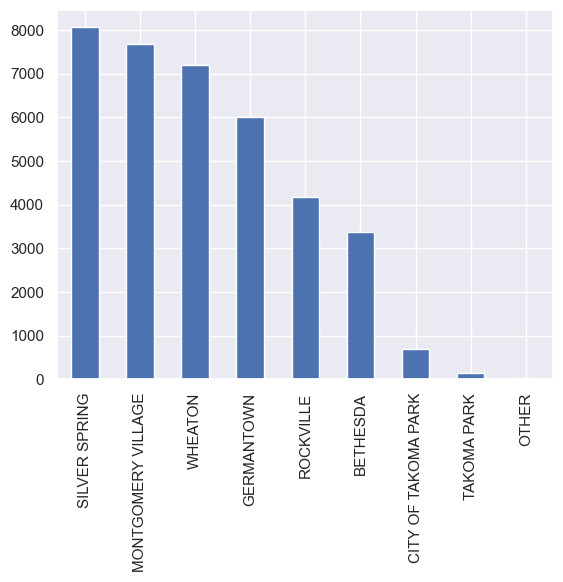

In [164]:
crimes[crimes.is_violent == True]['Police District Name'].value_counts().plot(kind='bar')

In [165]:
crimes[crimes.is_violent == True]['City'].value_counts()

SILVER SPRING         13495
GAITHERSBURG           5763
ROCKVILLE              4823
GERMANTOWN             4785
MONTGOMERY VILLAGE     1724
BETHESDA               1546
TAKOMA PARK             995
CLARKSBURG              486
KENSINGTON              482
BURTONSVILLE            476
POTOMAC                 446
OLNEY                   442
DERWOOD                 442
DAMASCUS                394
CHEVY CHASE             353
BOYDS                   166
MD City                 145
POOLESVILLE             130
BROOKEVILLE              64
SANDY SPRING             43
ASHTON                   38
DICKERSON                35
SPENCERVILLE             19
CABIN JOHN               15
MOUNT AIRY                8
GLEN ECHO                 8
BARNESVILLE               6
BRINKLOW                  6
HIGHLAND                  3
BEALLSVILLE               3
BELTSVILLE                3
MT AIRY                   2
WASHINGTON GROVE          2
LAUREL                    2
WASHINGTON                2
GARRETT PARK        

<AxesSubplot: >

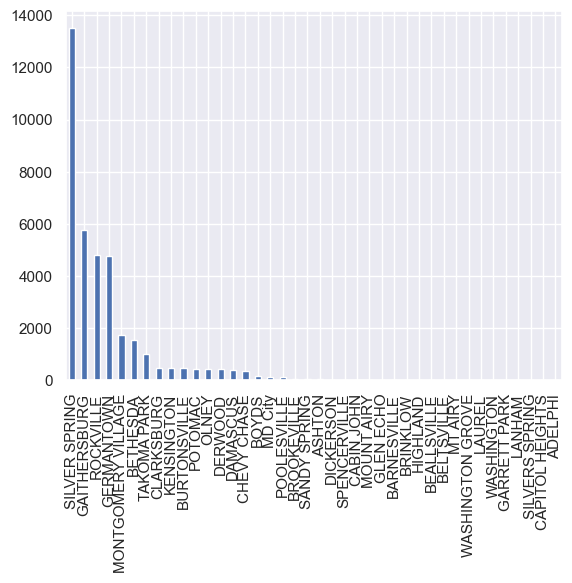

In [166]:
crimes[crimes.is_violent == True]['City'].value_counts().plot(kind='bar')

### As we see in the charts "SILVER SPRING" is the higest violance crime reported Police District and City on Montgomery County

In [168]:
# for violance crimes

In [169]:
crimes[crimes.is_violent == False]['Police District Name'].value_counts()

SILVER SPRING          56339
WHEATON                50377
MONTGOMERY VILLAGE     44858
BETHESDA               39400
ROCKVILLE              37364
GERMANTOWN             33255
CITY OF TAKOMA PARK     5785
TAKOMA PARK             1146
OTHER                    212
Name: Police District Name, dtype: int64

<AxesSubplot: >

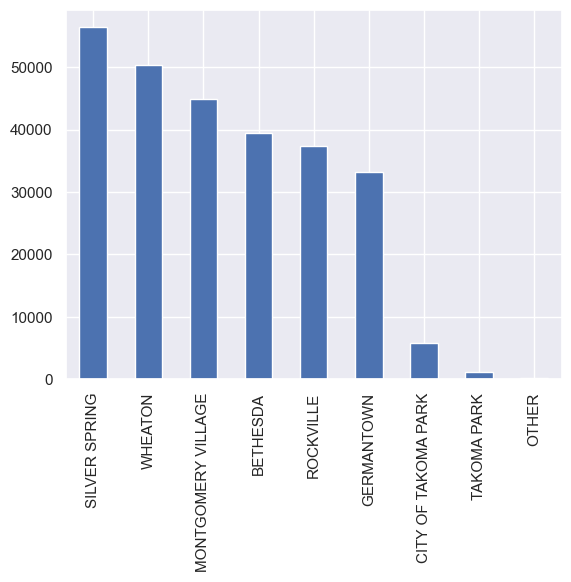

In [170]:
crimes[crimes.is_violent == False]['Police District Name'].value_counts().plot(kind='bar')

In [171]:
crimes[crimes.is_violent == False]['City'].value_counts()

SILVER SPRING    91992
GAITHERSBURG     38835
ROCKVILLE        37669
GERMANTOWN       25281
BETHESDA         19694
                 ...  
VIENNA               1
GREENBELT            1
BOWIE                1
HAGERSTOWN           1
ALEXANDRIA           1
Name: City, Length: 65, dtype: int64

<AxesSubplot: >

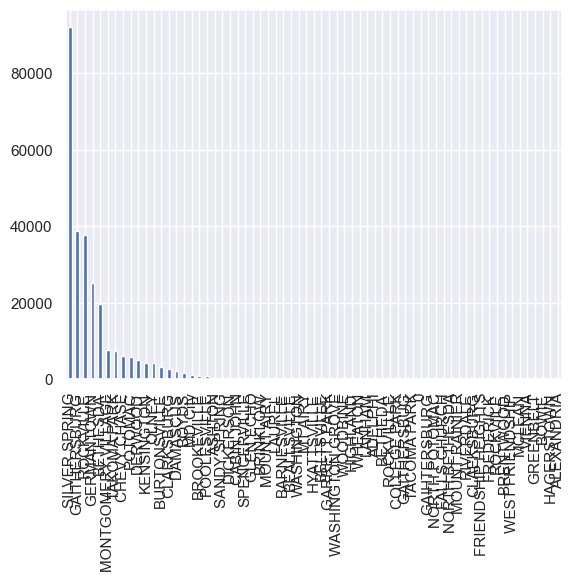

In [172]:
crimes[crimes.is_violent == False]['City'].value_counts().plot(kind='bar')

### As we see in the charts "SILVER SPRING" is the higest non violance crime reported Police District and City on Montgomery County

### It is cleare that "SILVER SPRING" is the most crimes occuring city and the police district on Montgomery County for all the



## Let's identify the overall top five crime subcategories which caused/resulted higher number of victims has change with the year from 2018 to 2022 of the overall most violence police district in Montgomery County identify the pattens and trends
#### As we know SILVER SPRING police district is the overall higest victimes from year 2018 to 2022. Let see how is the top crime subcategories¶

In [177]:
# select the dateset with column "Police District Name", "Crime Name2", "Victims", "Start_Date_Time"
slverSpringDf2 = crimes[["Police District Name", "Crime Name2", "Victims", "Start_Date_Time"]]
# filter column "Police District Name"
slverSpringDf2 = slverSpringDf2.query("`Police District Name`=='SILVER SPRING'")

# Add new column "Year" which extracted from "Start_Date_Time"
slverSpringDf2['Year'] = pd.DatetimeIndex(slverSpringDf2['Start_Date_Time']).year



slverSpringDf2.head()

,Police District Name,Crime Name2,Victims,Start_Date_Time,Year
2016-07-01,SILVER SPRING,Liquor Law Violations,1,2016-07-01 22:21:00,2016
2016-07-01,SILVER SPRING,Theft From Motor Vehicle,1,2016-07-01 23:15:00,2016
2016-07-01,SILVER SPRING,Liquor Law Violations,1,2016-07-01 20:13:00,2016
2016-07-01,SILVER SPRING,Motor Vehicle Theft,1,2016-07-01 21:00:00,2016
2016-07-01,SILVER SPRING,All Other Offenses,1,2016-07-01 21:05:00,2016


In [178]:
# check the datafram info
slverSpringDf2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64394 entries, 2016-07-01 to 2022-08-07
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Police District Name  64394 non-null  object        
 1   Crime Name2           64394 non-null  object        
 2   Victims               64394 non-null  int64         
 3   Start_Date_Time       64394 non-null  datetime64[ns]
 4   Year                  64394 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.9+ MB


### Clean up the datasent and create a datafram with only overall top five crime subcategory and in year 2018 to 2022 of SILVER SPRING police district

In [180]:
slverSpringDf2 = slverSpringDf2[slverSpringDf2["Crime Name2"].isin(top5CrimeCat['Crime Name2'].values)]

# drop "Police District Name","Dispatch Date / Time" since those not required for our data analysis
slverSpringDf3 =slverSpringDf2.drop(columns=["Police District Name","Start_Date_Time"])


# filter out the "All Other Offenses"
slverSpringDf3 = slverSpringDf3.query("`Crime Name2`!='All Other Offenses'")
slverSpringDf3.head()

,Crime Name2,Victims,Year
2016-07-01,Theft From Motor Vehicle,1,2016
2016-07-01,Driving Under the Influence,1,2016
2016-07-01,Destruction/Damage/Vandalism of Property,1,2016
2016-07-01,Destruction/Damage/Vandalism of Property,1,2016
2016-07-01,Theft From Motor Vehicle,1,2016


In [181]:
# unique values of "Crime Name2"
print(slverSpringDf3["Crime Name2"].unique())

['Theft From Motor Vehicle' 'Driving Under the Influence'
 'Destruction/Damage/Vandalism of Property' 'Drug/Narcotic Violations'
 'Simple Assault']


In [182]:
# unique values of "Crime Name2"
print(slverSpringDf3["Year"].unique())

[2016 2017 2018 2019 2020 2021 2022]


#### Filter out year except 2018 - 2022

In [184]:
slverSpringCleandDf = slverSpringDf3.query("Year != 2017 and Year !=2016")
slverSpringCleandDf

,Crime Name2,Victims,Year
2018-01-01,Drug/Narcotic Violations,1,2018
2018-01-01,Theft From Motor Vehicle,1,2018
2018-01-01,Theft From Motor Vehicle,1,2018
2018-01-01,Driving Under the Influence,1,2018
2018-01-01,Drug/Narcotic Violations,1,2018
...,...,...,...
2022-08-05,Driving Under the Influence,1,2022
2022-08-06,Destruction/Damage/Vandalism of Property,1,2022
2022-08-06,Destruction/Damage/Vandalism of Property,1,2022
2022-08-07,Drug/Narcotic Violations,1,2022


In [185]:
# unique values of "Crime Name2"
print(slverSpringCleandDf["Year"].unique())

[2018 2019 2020 2021 2022]


In [186]:
# create a pivot table of Victims, Year and Crime Name2 with the datafram 
povotTableDf = slverSpringCleandDf.pivot_table(values='Victims',index ='Year', columns='Crime Name2', aggfunc=len)
povotTableDf

Crime Name2,Destruction/Damage/Vandalism of Property,Driving Under the Influence,Drug/Narcotic Violations,Simple Assault,Theft From Motor Vehicle
Year,,,,,
2018,693,526,1449,715,1053
2019,631,560,1360,676,1085
2020,682,383,505,617,1151
2021,670,314,236,739,749
2022,352,217,326,448,366


### Plot a chart of victimes of overall top five crime subtypes of SILVER SPRING against year

<AxesSubplot: xlabel='Year'>

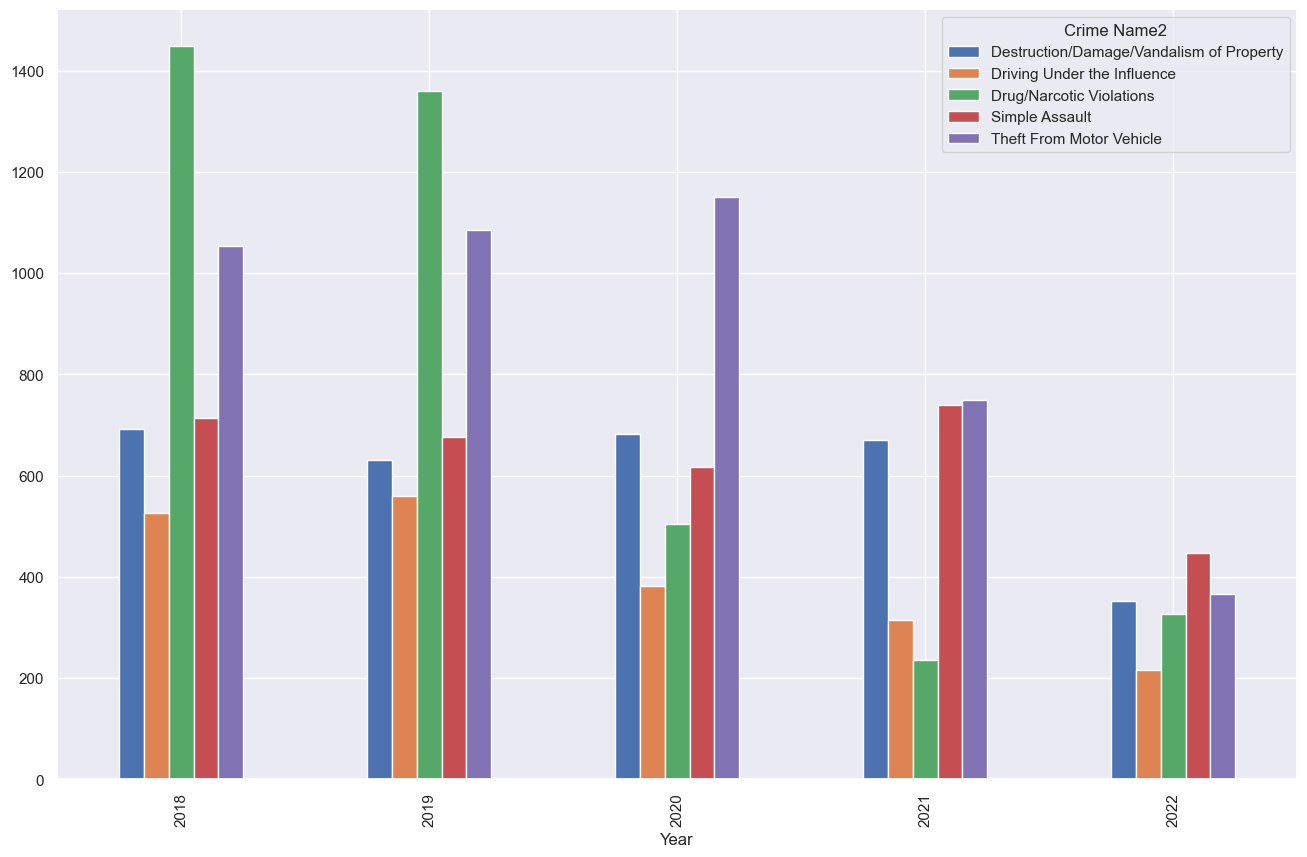

In [190]:
povotTableDf.plot.bar(figsize=(16,10))

### Same dataset with line chart

<AxesSubplot: xlabel='Year'>

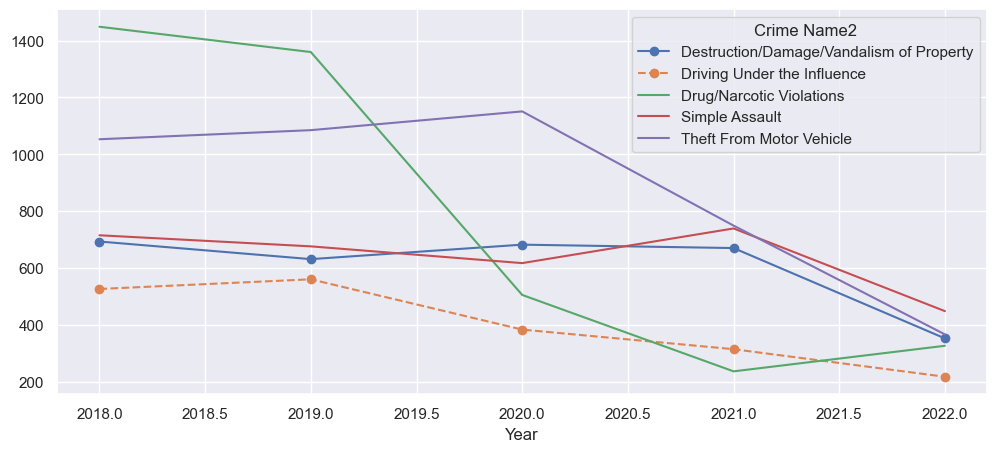

In [189]:
povotTableDf.plot(style=['-o', '--o'], figsize=(12, 5))